# Perform evaluation on the data

## assumptions 
The data will be returns an 1-dimension tensor (array) of the predictions for all the test images. 
This could then be compared against the labels to calculate the error 

In [1]:
import torch
import torchvision
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

Dummy Calculated Results: tensor([19, 27, 11, 16,  0, 19, 11, 13, 12, 16, 27, 18, 18, 26,  2, 15,  8, 12,
        20, 13, 13, 15, 23, 20, 20, 23, 26,  8, 26, 22])
Dummy Expected Results: tensor([19, 27, 11, 16,  0, 19, 12, 13, 12, 16, 27, 18, 17, 26,  2, 14,  8, 12,
        20, 13, 13, 15, 23, 20, 20, 23, 26,  9, 26, 22])


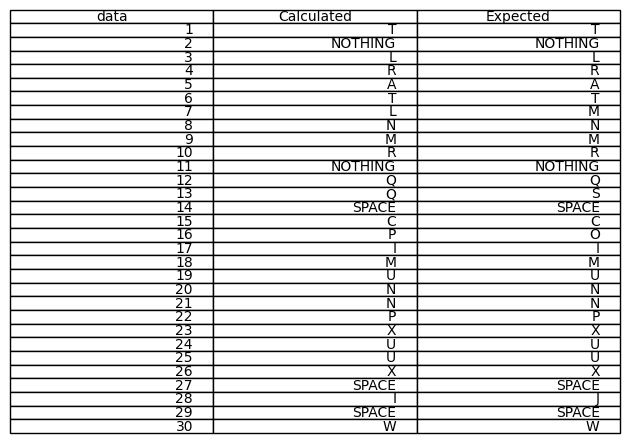

In [11]:
# usefull variables for the entire thing 
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "R", "S",
             "Q", "T", "U", "V", "W", "X", "Y", "Z", "SPACE", "NOTHING", "DELETE"]

# create some dummy test code 
n = 30
expected = torch.randint(0, 29, (n,))
calculated = expected.clone().detach()

mask = torch.randn(n)
for i in range(0, n, 3):
    calculated[i] += (mask.int())[i]
    calculated[i] = min(28, calculated[i])

print(f"Dummy Calculated Results: {calculated}")
print(f"Dummy Expected Results: {expected}")

# print out the data in a form that's readible 
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

calculated_format = []
expected_format = []
for i in range(0, n): 
    calculated_format.append(categories[calculated[i]])
    expected_format.append(categories[expected[i]])

df = pd.DataFrame({"data":list(range(1, n + 1)), "Calculated":calculated_format, "Expected":expected_format})

ax.table(cellText=df.values, colLabels=df.columns, loc='center')

fig.tight_layout()

plt.show()

In [12]:
# assume that both inputs are tensors
def calculate_accuracy(output, expected):
    correct_predictions = 0 
    n = output.shape[0]
    for i in range(n):
        if output[i] == expected[i]: 
            correct_predictions += 1

    return float(correct_predictions) / float(output.shape[0])

print(f"The Accuracy: {calculate_accuracy(calculated, expected)}")

The Accuracy: 0.8666666666666667


In [13]:
# perform multiclass f1 classification 

def individual_f1(output, expected, category):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    # go through all the values and calculate these 
    n = output.shape[0]
    for i in range(n):
        # positive
        if output[i] == category:
            if output[i] == expected[i]:
                true_positive += 1
            else: 
                false_positive += 1
        # negative
        else:
            if output[i] == expected[i]:
                true_negative += 1
            else: 
                false_negative += 1

    try: 
        precision = true_positive / (true_positive + false_positive)
    except ZeroDivisionError:
        precision = 0

    try:
        recall = true_positive / (true_positive + false_negative)
    except ZeroDivisionError:
        recall = 0

    try:
        f1_score = 2 * ((precision * recall) / (precision + recall))
    except ZeroDivisionError:
        f1_score = 0
    
    return f1_score

def F1(output, expected, categories):
    f1_scores = []
    # go through each category and calculate the f1 score for the category
    for category in range(len(categories)): 
        f = individual_f1(output, expected, category)
        f1_scores.append(f)

    # return the f1 scores
    # format as panda frame 
    f1_scores_reformatted = pd.DataFrame({
        "Categories" : categories,
        "F1 Scores" : f1_scores
    })
    return f1_scores_reformatted
    

In [14]:
print(F1(calculated, expected, categories))

   Categories  F1 Scores
0           A   0.333333
1           B   0.000000
2           C   0.333333
3           D   0.000000
4           E   0.000000
5           F   0.000000
6           G   0.000000
7           H   0.000000
8           I   0.333333
9           J   0.000000
10          K   0.000000
11          L   0.333333
12          M   0.500000
13          N   0.600000
14          O   0.000000
15          P   0.333333
16          R   0.500000
17          S   0.000000
18          Q   0.333333
19          T   0.500000
20          U   0.600000
21          V   0.000000
22          W   0.333333
23          X   0.500000
24          Y   0.000000
25          Z   0.000000
26      SPACE   0.600000
27    NOTHING   0.500000
28     DELETE   0.000000


## Compare with implementation of pytorch metrics

In [15]:
from torchmetrics.classification import MulticlassF1Score

f1_scoring = MulticlassF1Score(num_classes=len(categories), average=None)
f1_scores = f1_scoring(calculated, expected)

# return the f1 scores
# format as panda frame 
f1_scores_reformatted = pd.DataFrame({
    "Categories" : categories,
    "F1 Scores" : f1_scores
})
print(f1_scores_reformatted)

   Categories  F1 Scores
0           A   1.000000
1           B   0.000000
2           C   1.000000
3           D   0.000000
4           E   0.000000
5           F   0.000000
6           G   0.000000
7           H   0.000000
8           I   0.666667
9           J   0.000000
10          K   0.000000
11          L   0.666667
12          M   0.800000
13          N   1.000000
14          O   0.000000
15          P   0.666667
16          R   1.000000
17          S   0.000000
18          Q   0.666667
19          T   1.000000
20          U   1.000000
21          V   0.000000
22          W   1.000000
23          X   1.000000
24          Y   0.000000
25          Z   0.000000
26      SPACE   1.000000
27    NOTHING   1.000000
28     DELETE   0.000000


## Graph the F1 overtime

In [19]:
difference = expected - calculated
print(difference)

difference = difference / 10.0
print(difference)

tensor([ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0])
tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.1000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000, -0.1000,  0.0000,  0.0000, -0.1000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.1000,  0.0000,  0.0000])


In [27]:
f1_score_averages = []

for i in range(9):
    f1_scoring = MulticlassF1Score(num_classes=len(categories))
    f1_score_average = f1_scoring(calculated, expected)
    f1_score_averages.append(f1_score_average.item())
    calculated = calculated + difference 

f1_score_averages_formatted = pd.DataFrame({
    "Mean F1 Score for Categories" : f1_score_averages
})

print(f1_score_averages_formatted)

   Mean F1 Score for Categories
0                      0.794445
1                      0.794445
2                      0.794445
3                      0.794445
4                      0.746867
5                      0.746867
6                      0.746867
7                      0.746867
8                      0.746867


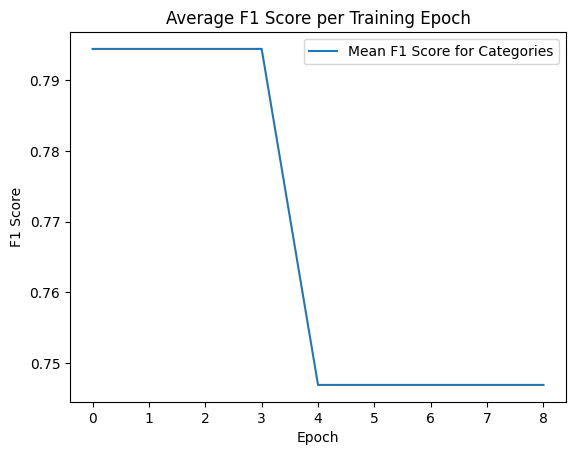

In [29]:
plot = f1_score_averages_formatted.plot(xlabel="Epoch", ylabel="F1 Score", title="Average F1 Score per Training Epoch")